# Loans Data Exploration
## by Mohamed Youssef

## Preliminary Wrangling

> This data set contains 84853 loans originated after July 2009. including loan amount, interest rate and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load the dataset
df = pd.read_csv('LoanData.csv')
df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedReturn,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment
0,36,Current,0.12016,0.0920,0.0820,0.05470,7.0,2,Professional,Employed,44.0,False,0.18,"$50,000-74,999",10000,318.93
1,36,Current,0.12528,0.0974,0.0874,0.06000,9.0,16,Skilled Labor,Employed,113.0,True,0.15,"$25,000-49,999",10000,321.45
2,36,Current,0.24614,0.2085,0.1985,0.09066,4.0,2,Executive,Employed,44.0,True,0.26,"$100,000+",15000,563.97
3,60,Current,0.15425,0.1314,0.1214,0.07077,10.0,1,Professional,Employed,82.0,True,0.36,"$100,000+",15000,342.37
4,36,Current,0.31032,0.2712,0.2612,0.11070,2.0,1,Sales - Retail,Employed,172.0,False,0.27,"$25,000-49,999",3000,122.67


In [3]:
# overview of data
df.shape

(84853, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Term                       84853 non-null  int64  
 1   LoanStatus                 84853 non-null  object 
 2   BorrowerAPR                84853 non-null  float64
 3   BorrowerRate               84853 non-null  float64
 4   LenderYield                84853 non-null  float64
 5   EstimatedReturn            84853 non-null  float64
 6   ProsperScore               84853 non-null  float64
 7   ListingCategory (numeric)  84853 non-null  int64  
 8   Occupation                 83520 non-null  object 
 9   EmploymentStatus           84853 non-null  object 
 10  EmploymentStatusDuration   84834 non-null  float64
 11  IsBorrowerHomeowner        84853 non-null  bool   
 12  DebtToIncomeRatio          77557 non-null  float64
 13  IncomeRange                84853 non-null  obj

In [5]:
# removing None values, and Occupation column because we already have EmploymentStatus column, and DebtToIncomeRatio, ListingCategory because they are not useful for us 
df = df[df.EmploymentStatusDuration.notnull()]
df.drop(columns=['Occupation', 'DebtToIncomeRatio', 'ListingCategory (numeric)'],  inplace=True)
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Term                      84834 non-null  int64  
 1   LoanStatus                84834 non-null  object 
 2   BorrowerAPR               84834 non-null  float64
 3   BorrowerRate              84834 non-null  float64
 4   LenderYield               84834 non-null  float64
 5   EstimatedReturn           84834 non-null  float64
 6   ProsperScore              84834 non-null  float64
 7   EmploymentStatus          84834 non-null  object 
 8   EmploymentStatusDuration  84834 non-null  float64
 9   IsBorrowerHomeowner       84834 non-null  bool   
 10  IncomeRange               84834 non-null  object 
 11  LoanOriginalAmount        84834 non-null  int64  
 12  MonthlyLoanPayment        84834 non-null  float64
dtypes: bool(1), float64(7), int64(2), object(3)
memory usage: 8.5

In [6]:
df.EmploymentStatus.value_counts()

Employed         67309
Full-time         7917
Self-employed     4536
Other             3800
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [7]:
df.IncomeRange.value_counts()

$50,000-74,999    25623
$25,000-49,999    24167
$100,000+         15202
$75,000-99,999    14496
$1-24,999          4652
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [8]:
# convert EmploymentStatus into categorical types
Status = ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired']
income = ['Not employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']

var = pd.api.types.CategoricalDtype(ordered = False,  categories = Status)
var2 = pd.api.types.CategoricalDtype(ordered = True,  categories = income)

df.EmploymentStatus = df.EmploymentStatus.astype(var)
df.IncomeRange = df.IncomeRange.astype(var2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84834 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Term                      84834 non-null  int64   
 1   LoanStatus                84834 non-null  object  
 2   BorrowerAPR               84834 non-null  float64 
 3   BorrowerRate              84834 non-null  float64 
 4   LenderYield               84834 non-null  float64 
 5   EstimatedReturn           84834 non-null  float64 
 6   ProsperScore              84834 non-null  float64 
 7   EmploymentStatus          84834 non-null  category
 8   EmploymentStatusDuration  84834 non-null  float64 
 9   IsBorrowerHomeowner       84834 non-null  bool    
 10  IncomeRange               84789 non-null  category
 11  LoanOriginalAmount        84834 non-null  int64   
 12  MonthlyLoanPayment        84834 non-null  float64 
dtypes: bool(1), category(2), float64(7), int64(2),

In [9]:
df.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedReturn,ProsperScore,EmploymentStatusDuration,LoanOriginalAmount,MonthlyLoanPayment
count,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000,84834.000000
mean,42.487022,0.226655,0.196018,0.186013,0.096066,5.950032,103.055320,9083.936606,291.944727
std,11.640977,0.079917,0.074632,0.074632,0.030404,2.376553,97.078884,6287.680594,186.676629
min,12.000000,0.045830,0.040000,0.030000,-0.182700,1.000000,0.000000,1000.000000,0.000000
25%,36.000000,0.163280,0.135900,0.125900,0.074080,4.000000,30.000000,4000.000000,157.330000
50%,36.000000,0.219450,0.187500,0.177500,0.091700,6.000000,74.000000,7500.000000,251.940000
75%,60.000000,0.292540,0.257400,0.247400,0.116600,8.000000,148.000000,13500.000000,388.350000
max,60.000000,0.423950,0.360000,0.340000,0.283700,11.000000,755.000000,35000.000000,2251.510000


### What is the structure of your dataset?

> There are 84834 Loans in the dataset with 12 features ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedReturn', 'ProsperScore', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'LoanOriginalAmount', 'MonthlyLoanPayment']. Most variables are numeric, but the variables IsBorrowerHomeowner is bool and EmploymentStatus, IncomeRange are category.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out Are there differences between loans depending on how large the original loan amount was? and What affects the borrower’s APR or interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that there is a relation between loan’s Original Amount and Employment Status, IncomeRange and maybe IsBorrowerHomeowner. and for interest rate(APR) I think LoanOriginalAmount, IncomeRange and MonthlyLoanPayment would have an effect, and of course BorrowerRate.

## Univariate Exploration

> I am starting by looking at the distribution of the main variables of interest: BorrowerAPR.

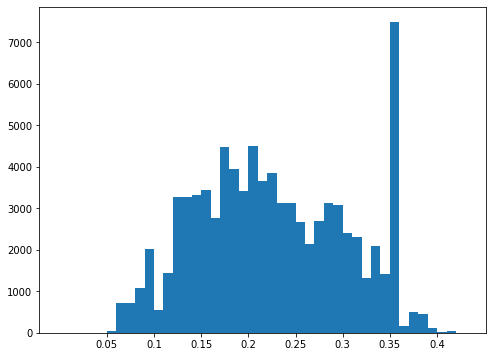

In [10]:
#BorrowerAPR distribution
b_APR = np.arange(0,df.BorrowerAPR.max()+0.01,0.01)
ticks_APR = np.arange(0.05,df.BorrowerAPR.max(),0.05)
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[0]
plt.hist(data=df, x='BorrowerAPR', color=base_color,bins=b_APR);
plt.xticks(ticks_APR,np.round(ticks_APR,2));

BorrowerAPR is normally distributed, Interestingly, there's a jump in frequency right after 3.5, rather than a smooth up.

Next , the  predictor variables for BorrowerAPR:LoanOriginalAmount, IncomeRange and MonthlyLoanPayment.

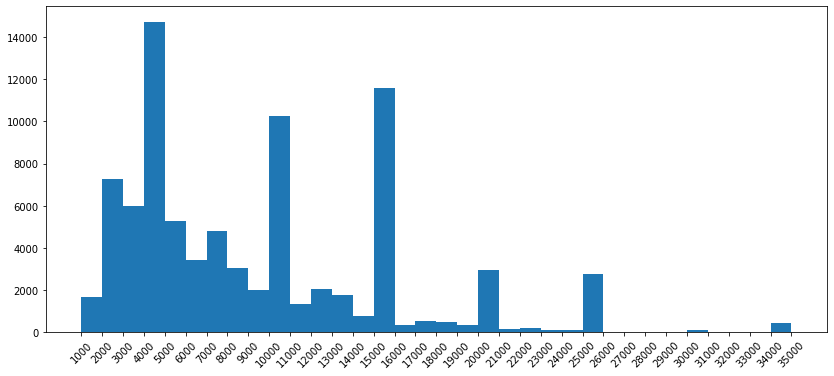

In [11]:
#LoanOriginalAmount distribution

b_Original = np.arange(1000,df.LoanOriginalAmount.max()+1000,1000)
plt.figure(figsize = [14,6])
base_color = sb.color_palette()[0]
plt.hist(data=df, x='LoanOriginalAmount', color=base_color,bins=b_Original);
plt.xticks(b_Original,np.round(b_Original), rotation=45);

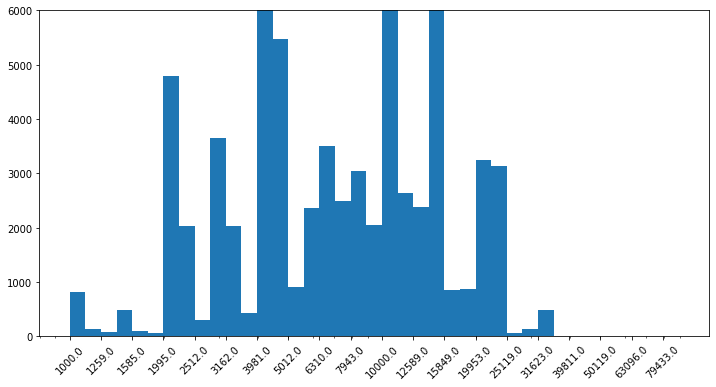

In [12]:
plt.figure(figsize = [12,6])
ticks_Original2 =10 ** np.arange(3,5,0.1)
b_Original2 = 10 ** np.arange(3,5,0.05)
base_color = sb.color_palette()[0]
plt.hist(data=df, x='LoanOriginalAmount', color=base_color,bins=b_Original2);
plt.xscale('log');
plt.xticks(ticks_Original2,np.round(ticks_Original2), rotation=45);

#ro exclude the outliers
plt.ylim(0,6000);

Loan Original Amount has a right skewed distribution, with a lot of loans lass than 10K, and it has peaks at the solid numbers like 4K,10K,15K which makes sense. When plotted on a log-scale, the distribution looks roughly bimodal, with peaks at numbers like 2K,4K,10K,15K,20K.

next, IncomeRange

In [13]:
df.IncomeRange.describe()

count              84789
unique                 6
top       $50,000-74,999
freq               25623
Name: IncomeRange, dtype: object

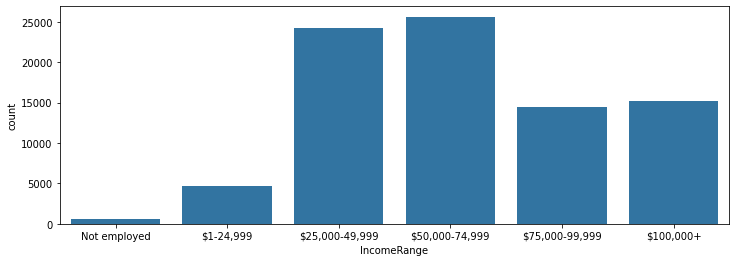

In [14]:
plt.figure(figsize = [12, 4])
sb.countplot(data = df, x = 'IncomeRange', color = base_color);
plt.xlabel('IncomeRange');

we found that mid Ranges are the most frequent with Borrowers

next, MonthlyLoanPayment

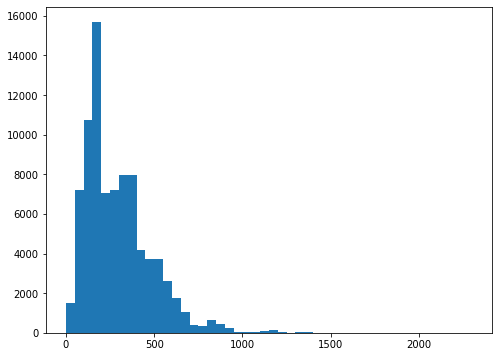

In [15]:
#MonthlyLoanPayment distribution

plt.figure(figsize = [8,6])
b_Month = np.arange(0,df.MonthlyLoanPayment.max()+50,50)
plt.hist(data=df, x='MonthlyLoanPayment', color=base_color, bins=b_Month);

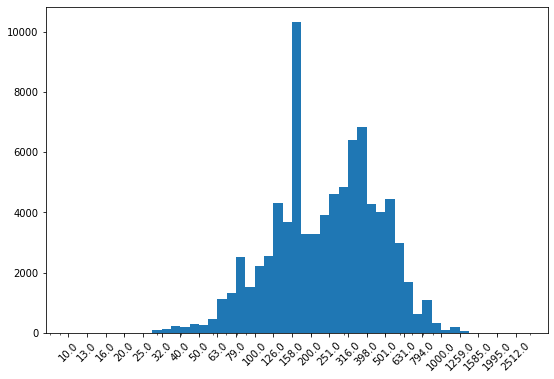

In [16]:
plt.figure(figsize = [9,6])
b_Month = 10 ** np.arange(1,3.5,0.05)
ticks_Month = 10 ** np.arange(1,3.5,0.1)
plt.hist(data=df, x='MonthlyLoanPayment', color=base_color, bins=b_Month);
plt.xscale('log');
plt.xticks(ticks_Month,np.round(ticks_Month), rotation=45);

When Monthly Loan Payment plotted on a log-scale, the distribution looks normally distributed , there's a steep jump in frequency before 200


Next , we think that maybe there are a relation between Loan Original Amount and the Employment Status and maybe IsBorrowerHomeowner, so we will explore these too

Text(0.5, 0, 'EmploymentStatusDuration')

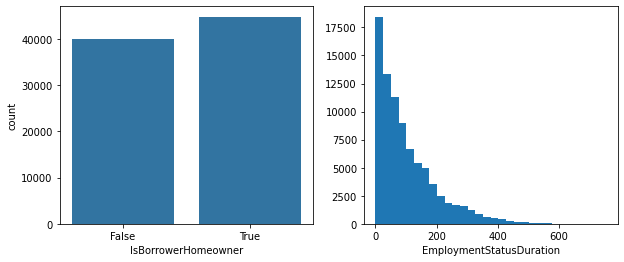

In [17]:
#IsBorrowerHomeowner

plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color);
plt.xlabel('IsBorrowerHomeowner')

plt.subplot(1, 2, 2)
plt.hist(data = df, x = 'EmploymentStatusDuration', color = base_color,bins=30);
plt.xlabel('EmploymentStatusDuration')

Text(0.5, 0, 'EmploymentStatusDuration')

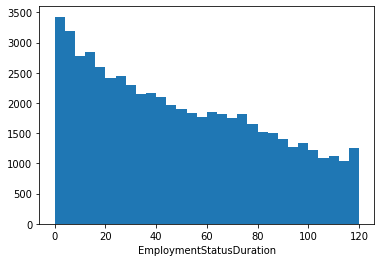

In [18]:
# Durations les than 12 month
plt.hist(data = df.query('EmploymentStatusDuration <= 120'), x = 'EmploymentStatusDuration', color = base_color,bins=30);
plt.xlabel('EmploymentStatusDuration')

we could see that Employment Status Duration is right skewed with most people foten work for les than 12 month, and nearly half the Borrowers have their own houses 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>LoanOriginalAmount and MonthlyLoanPayment took on a large range of values so we used a log transform, and they looked bimodal and normally distributed.
for LoanOriginalAmount there were some peaks in the exact values of thousands (5K, 10K, etc..), and for MonthlyLoanPayment there's a steep jump in frequency before 200.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the EmploymentStatusDuration and LoanOriginalAmount variables, a number of outlier points were identified. all of these points were filterd from the plots using ylim and querys.

## Bivariate Exploration

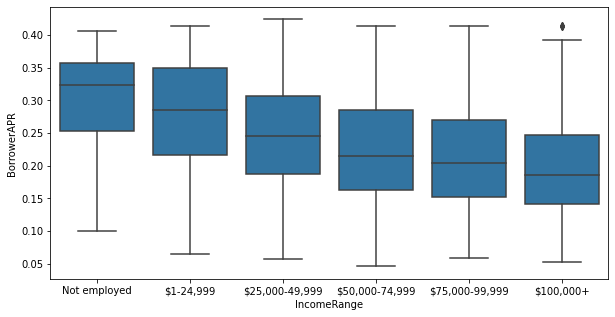

In [19]:
#IncomeRange with BorrowerAPR
plt.figure(figsize = [10, 5])
sb.boxplot(data=df, x='IncomeRange', y='BorrowerAPR', color=base_color);

> from the boxplot we see that the more the income range is the less the mean of APR is.

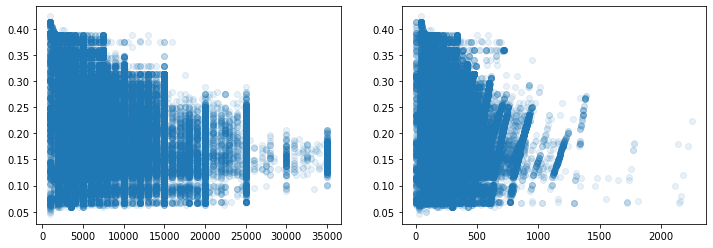

In [34]:
#LoanOriginalAmountand MonthlyLoanPayment with BorrowerAPR
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.scatter(data =df, x='LoanOriginalAmount', y='BorrowerAPR', alpha=1/10);
#plt.ylim(0.20,0.45);

plt.subplot(1, 2, 2)
plt.scatter(data=df, x='MonthlyLoanPayment', y='BorrowerAPR', alpha=1/10);
#to exclude outliers
plt.xlim(0,1300);

> from the two plots above, we can see that larger values of APR (0.3:0.4) tend to come with smaller values of Monthly Loan Payment and also Loan Original Amount.

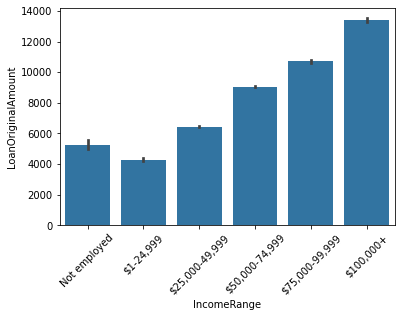

In [21]:
#IncomeRange
sb.barplot(data=df, x='IncomeRange', y='LoanOriginalAmount', color=base_color);
plt.xticks(rotation=45);

> and this barplot shows us that people who earn larger Income tend to Borrow larger loans

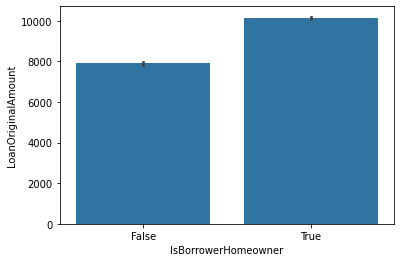

In [22]:
#LoanOriginalAmount with IsBorrowerHomeowner

sb.barplot(data=df, x='IsBorrowerHomeowner', y='LoanOriginalAmount', color=base_color);

> the barplot shows us that people who own Houses tands to Borrow larger loans


finally, I want to look at the pairwise correlations present between features in the data.

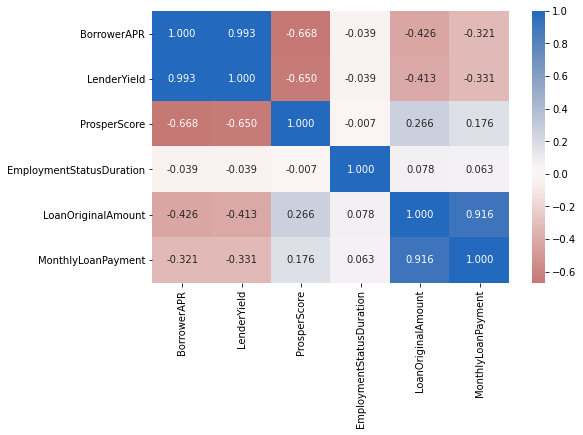

In [23]:
# correlation plot
numeric_vars = ['BorrowerAPR', 'LenderYield', 'ProsperScore', 'EmploymentStatusDuration', 'LoanOriginalAmount', 'MonthlyLoanPayment']
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

> the correlation coefficient between LenderYield and BorrowerAPR is very high, also between LoanOriginalAmount and MonthlyLoanPayment.
the correlation coefficient between LoanOriginalAmount, MonthlyLoanPayment and BorrowerAPR is negative as we saw in previous plots.
we also see a negative correlation coefficient between BorrowerAPR and ProsperScore.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> BorrowerAPR has a negative correlation with both LoanOriginalAmount and MonthlyLoanPayment, with large values of them, the APR  tends to be in a smaller. also it is observed that there is a negative relation with income range.

> we also observe some differences between loans, that big loans are more borrowed by people who own Houses and have a larger Income.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> we saw a negative correlation coefficient between BorrowerAPR and ProsperScore, as the score ranges from 1-10, with 10 being lowest risk score. and the correlation coefficient between LenderYield and BorrowerAPR is very high, which completly make sense.

## Multivariate Exploration


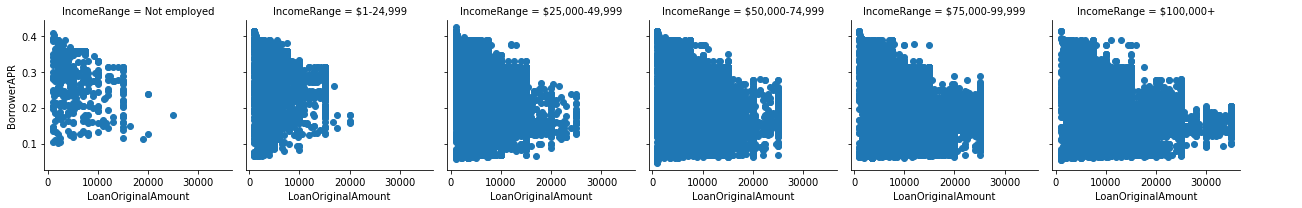

In [24]:
g = sb.FacetGrid(data = df, col = 'IncomeRange', palette = 'colorblind',margin_titles=True);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR');
g.add_legend()

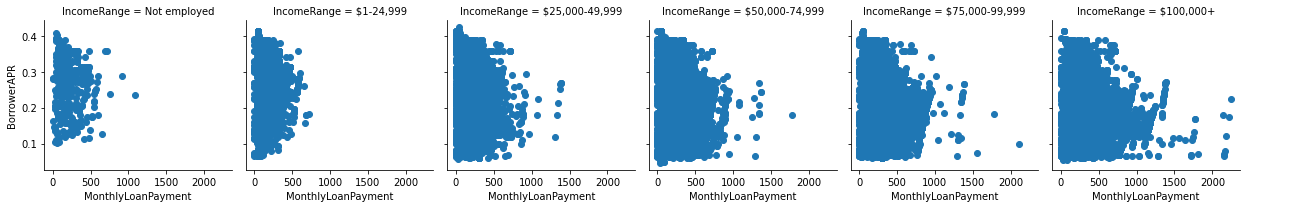

In [36]:
g = sb.FacetGrid(data = df, col = 'IncomeRange', palette = 'colorblind',margin_titles=True);
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR');
g.add_legend();

> from the previous two plots, with an increase of income range we see an increase in ranges of both LoanOriginalAmount and MonthlyLoanPayment, which is logical because all three values are negatively correlated with BorrowerAPR, which has a smaller range with the large values of the 3 variables.

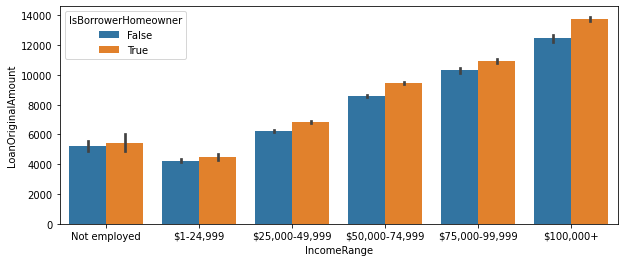

In [26]:
plt.figure(figsize = [10, 4])
sb.barplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner');

>from this plot we see house owners who earn +100K tends to borrow larger loans as we expected.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of BorrowerAPR against Loans in this section by looking at the impact of the three features. The multivariate exploration here showed that there indeed is a negative effect of increased MonthlyLoanPayment and LoanOriginalAmount on BorrowerAPR.
I wanted to check the relation between LoanOriginalAmount and both IncomeRange and IsBorrowerHomeowner, too. and it came as expected (positive effect of IncomeRange and IsBorrowerHomeowner on LoanOriginalAmount)

### Were there any interesting or surprising interactions between features?

> it is interesting that with small values of APR (0:0.2) the MonthlyLoanPayment and LoanOriginalAmoun have no significant effect